<a href="https://colab.research.google.com/github/adijams01/SDC_Projects/blob/main/TrafficSignClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("drive/My Drive/archive (3).zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# Walk through  directory and list number of files
print("TRAIN---")
for dirpath, dirnames, filenames in os.walk("/content/output/train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("TEST---")
for dirpath, dirnames, filenames in os.walk("/content/output/test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

TRAIN---
There are 43 directories and 0 images in '/content/output/train'.
There are 0 directories and 960 images in '/content/output/train/18'.
There are 0 directories and 192 images in '/content/output/train/27'.
There are 0 directories and 1776 images in '/content/output/train/1'.
There are 0 directories and 1200 images in '/content/output/train/25'.
There are 0 directories and 960 images in '/content/output/train/35'.
There are 0 directories and 312 images in '/content/output/train/22'.
There are 0 directories and 1680 images in '/content/output/train/12'.
There are 0 directories and 1608 images in '/content/output/train/10'.
There are 0 directories and 1056 images in '/content/output/train/11'.
There are 0 directories and 1128 images in '/content/output/train/3'.
There are 0 directories and 168 images in '/content/output/train/0'.
There are 0 directories and 240 images in '/content/output/train/39'.
There are 0 directories and 480 images in '/content/output/train/26'.
There are 0 

In [ ]:
train_dir="/content/output/train"
test_dir="/content/output/test/"
val_dir="/content/output/val/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9']


Image shape: (31, 35, 3)


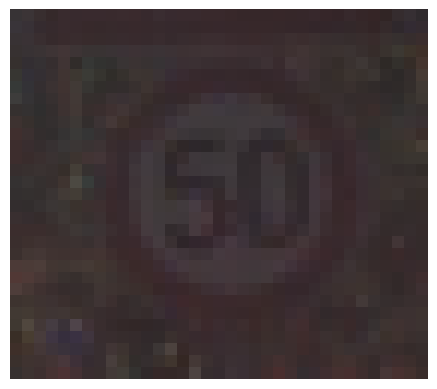

In [ ]:
img = mpimg.imread("/content/output/train/2/00002_00000_00001.png")
plt.imshow(img)
plt.axis("off");

print(f"Image shape: {img.shape}") 

## DataProcessing

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 31367 images belonging to 43 classes.
Found 3922 images belonging to 43 classes.


In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
     

## Baseline model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Activation

In [ ]:
# Create our model (baseline model)
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(43, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_1.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_1 = model_1.fit(train_data, # now 3 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))
     

Epoch 1/5
981/981 [==============================] - 58s 57ms/step - loss: 0.6945 - accuracy: 0.8202 - val_loss: 0.2153 - val_accuracy: 0.9447
Epoch 2/5
981/981 [==============================] - 51s 52ms/step - loss: 0.1173 - accuracy: 0.9684 - val_loss: 0.1718 - val_accuracy: 0.9618
Epoch 3/5
981/981 [==============================] - 51s 52ms/step - loss: 0.0746 - accuracy: 0.9801 - val_loss: 0.1736 - val_accuracy: 0.9607
Epoch 4/5
981/981 [==============================] - 55s 56ms/step - loss: 0.0563 - accuracy: 0.9852 - val_loss: 0.2510 - val_accuracy: 0.9526
Epoch 5/5
981/981 [==============================] - 58s 59ms/step - loss: 0.0313 - accuracy: 0.9916 - val_loss: 0.2753 - val_accuracy: 0.9510


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
# Evaluate on the test data
model_1.evaluate(test_data)

123/123 [==============================] - 5s 40ms/step - loss: 0.2753 - accuracy: 0.9510


[0.2752743363380432, 0.9510453939437866]

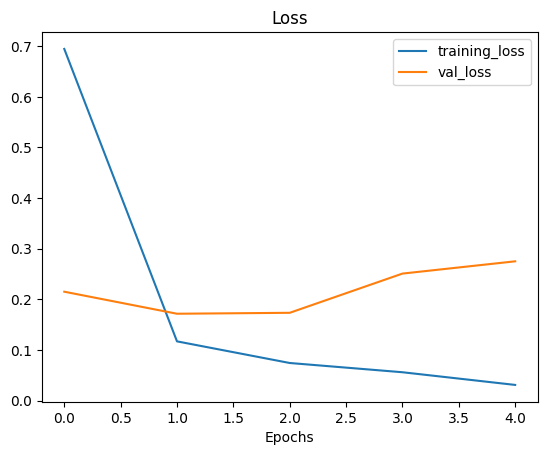

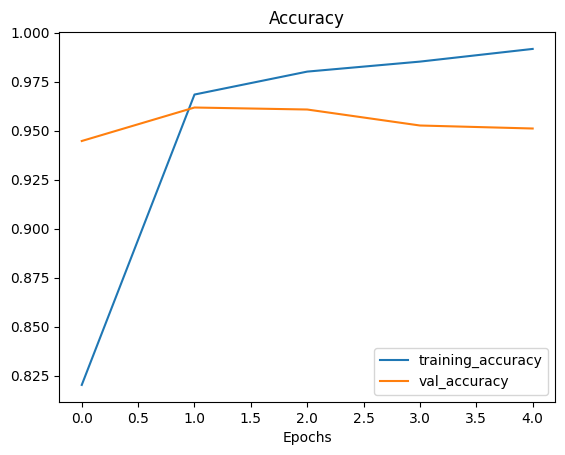

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_1)

## Data Spliting

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/train', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 39209 files [00:04, 7858.14 files/s]


## transfer learning

In [ ]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback
     

In [ ]:

import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:

# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# New: EfficientNetB0 feature vector (version 2)
efficientnet_2_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

# MobileNet V2 feature vector
mobilenet_url="https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(224,224,3)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

### eff.net v1

In [ ]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20230414-063246
Epoch 1/5
981/981 [==============================] - 87s 77ms/step - loss: 1.2146 - accuracy: 0.6829 - val_loss: 0.7422 - val_accuracy: 0.8072
Epoch 2/5
981/981 [==============================] - 72s 73ms/step - loss: 0.6006 - accuracy: 0.8464 - val_loss: 0.5357 - val_accuracy: 0.8582
Epoch 3/5
981/981 [==============================] - 69s 70ms/step - loss: 0.4458 - accuracy: 0.8855 - val_loss: 0.4302 - val_accuracy: 0.8893
Epoch 4/5
981/981 [==============================] - 69s 70ms/step - loss: 0.3613 - accuracy: 0.9076 - val_loss: 0.3807 - val_accuracy: 0.8965
Epoch 5/5
981/981 [==============================] - 72s 74ms/step - loss: 0.3050 - accuracy: 0.9241 - val_loss: 0.3446 - val_accuracy: 0.9049


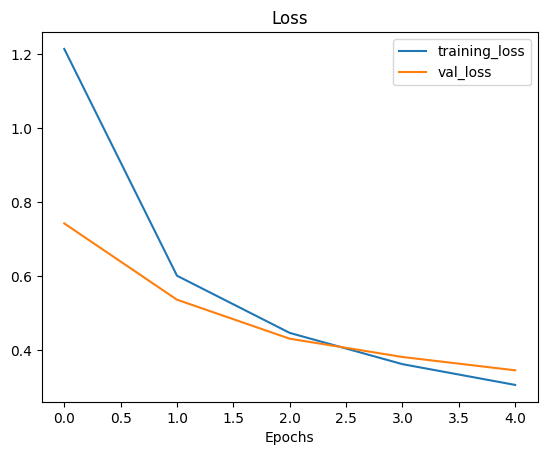

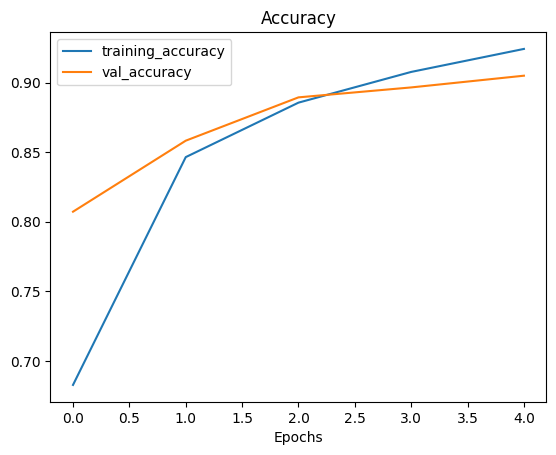

In [ ]:

plot_loss_curves(efficientnet_history)

In [ ]:

efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 43)                55083     
                                                                 
Total params: 4,104,647
Trainable params: 55,083
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
# Evaluate on the test data
efficientnet_model.evaluate(test_data)

123/123 [==============================] - 8s 67ms/step - loss: 0.3446 - accuracy: 0.9049


[0.34460902214050293, 0.9048954844474792]

## predictions

In [ ]:

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:

# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:

# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)
     

['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9']


1/1 [==============================] - 0s 71ms/step


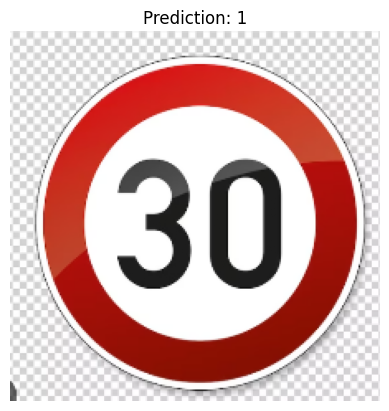

In [ ]:
# Make a prediction using efficienet_2_model
pred_and_plot(model=model_1, 
              filename="/content/30kmph2.png", 
              class_names=class_names)

1/1 [==============================] - 0s 29ms/step


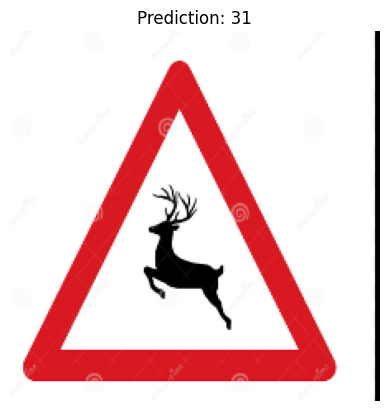

In [ ]:
# Make a prediction using efficienet_2_model
pred_and_plot(model=model_1, 
              filename="/content/deer.png", 
              class_names=class_names)